<a href="https://colab.research.google.com/github/vicensi/Deep-learning/blob/main/Exemplo_Classifica%C3%A7%C3%A3o_Autoencoder_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, ConfusionMatrixDisplay
from sklearn.manifold import TSNE


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_img= Input(shape=(784,))
encoded = Dense(units=32, activation='relu')(input_img)
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [ ]:
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoder = Model(input_img, encoded)
encoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

In [ ]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
encoded_imgs.shape

(10000, 32)

In [ ]:
predicted.shape

(10000, 784)

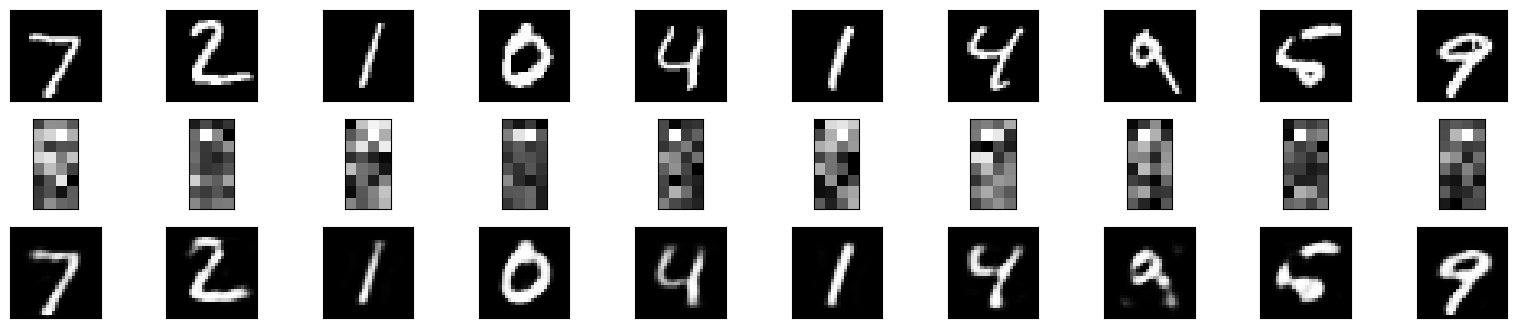

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()

In [ ]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(60000, 32)
(10000, 32)


# Processo de Classificaçao com Random Forest

In [ ]:
modelRf = RandomForestClassifier()
modelRf.fit(X_train_encoded, y_train)
y_pred = modelRf.predict(X_test_encoded)

In [ ]:
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.93      0.93      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.92      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.92      0.94      1028
           8       0.91      0.93      0.92       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

0.9433


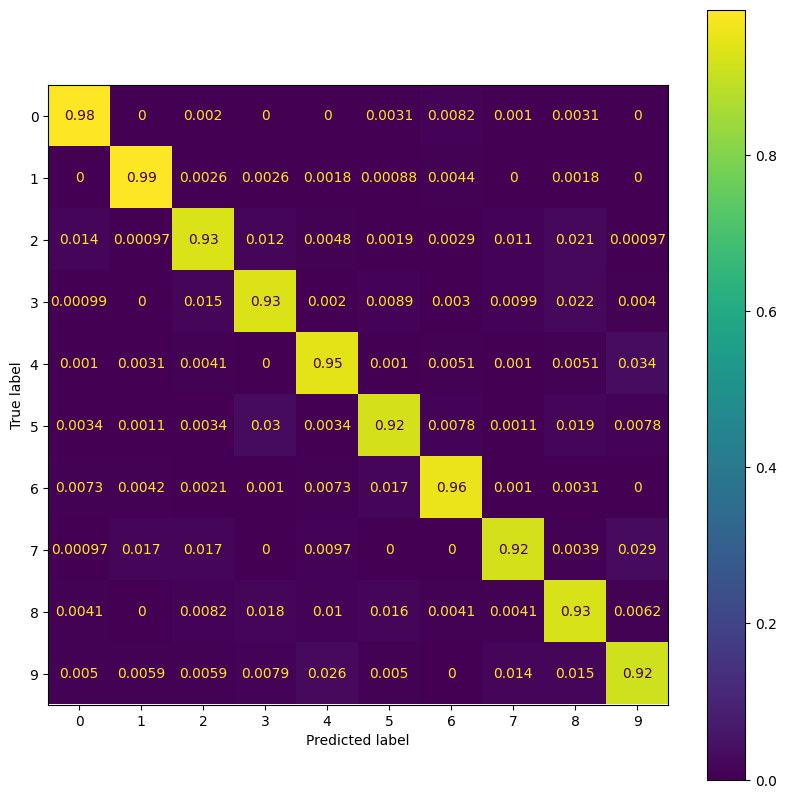

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

cm = confusion_matrix(y_test, y_pred, labels=modelRf.classes_, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelRf.classes_)

disp.plot(ax = ax)
plt.show()

# Exemplo de Data Visualization a partir da camada Coded do Autoencoder

In [ ]:
tsne = TSNE(n_iter=2000)
X_embedded_tsne = tsne.fit_transform(X_test_encoded)


<Axes: >

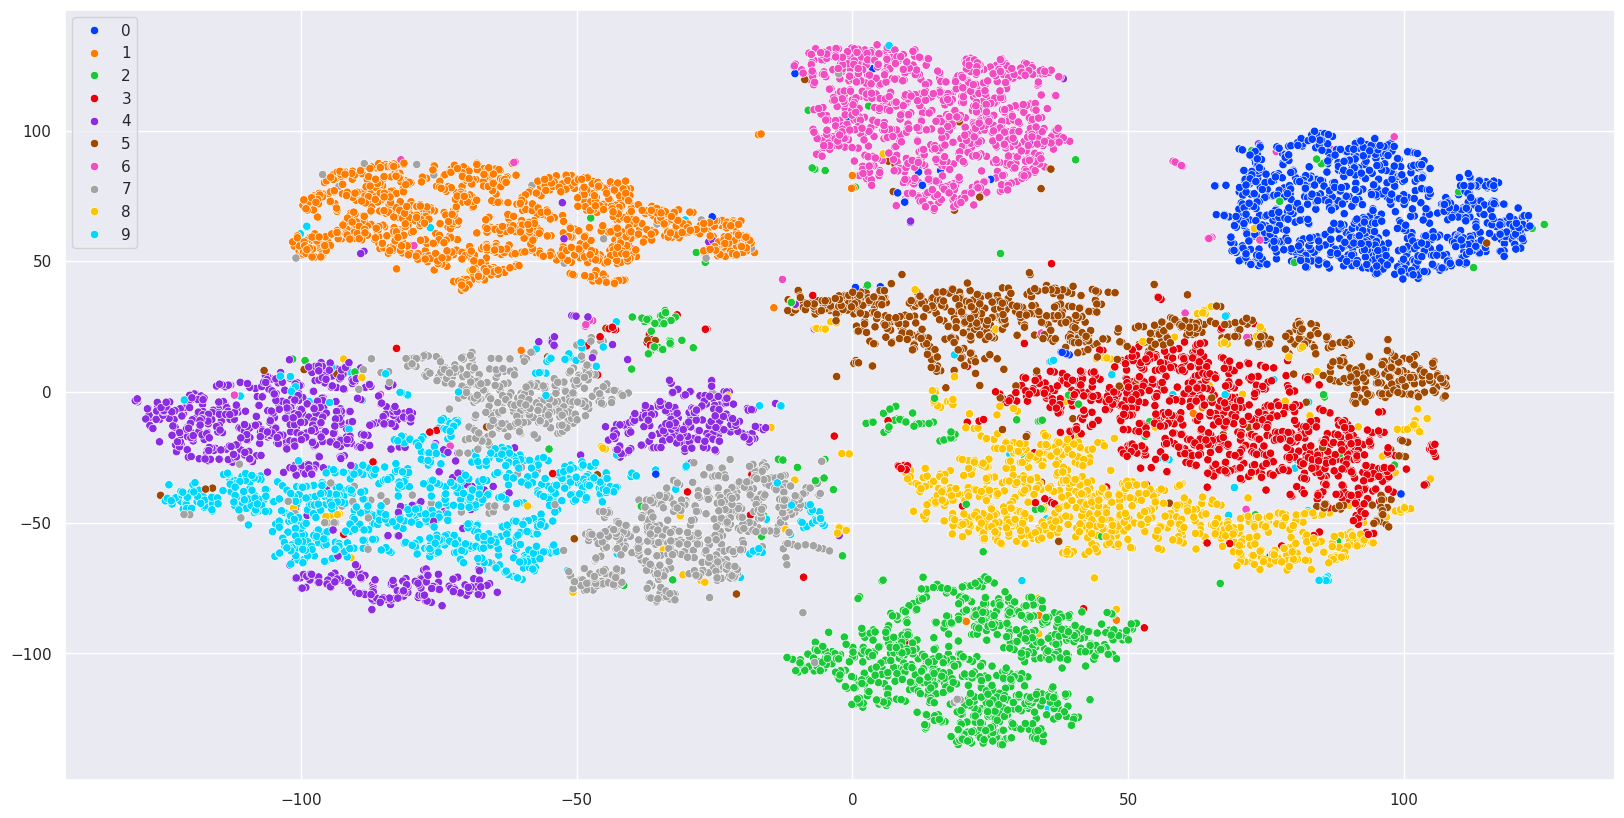

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(x = X_embedded_tsne[:,0], y = X_embedded_tsne[:,1], hue=y_test, legend='full', palette=palette)

In [ ]:
X_embedded_tsne.shape

(10000, 2)